In [1]:
import pickle
from pprint import pprint
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import sys
import os
address = (os.sep).join(os.getcwd().split(os.sep)[:-3])
print(address)
sys.path.append(address)
print(sys.path)
import util.items as items
import util.scraper as scraper

/home/makoa/School/osrs_research
['/usr/lib/python36.zip', '/usr/lib/python3.6', '/usr/lib/python3.6/lib-dynload', '', '/home/makoa/.local/lib/python3.6/site-packages', '/usr/local/lib/python3.6/dist-packages', '/usr/lib/python3/dist-packages', '/home/makoa/.local/lib/python3.6/site-packages/IPython/extensions', '/home/makoa/.ipython', '/home/makoa/School/osrs_research']


In [3]:
with open('all_1000.pickle','rb') as f:
    results = pickle.load(f)

In [4]:
len(results)

2408

In [5]:
results['Abyssal_whip'].keys()

dict_keys(['numPrices', 'startMAE', 'numBuys', 'item', 'budget', 'persist', 'startLoss', 'endLoss', 'predictions', 'sellSignal', 'model', 'endMAE', 'testPrices', 'numEpochs', 'perfect', 'buySignal', 'buyAndHold', 'buyLimit', 'numSells'])

In [6]:
modelProfs = [(item,results[item]['model']) for item in results ]
modelProfs = sorted(modelProfs, key=lambda x: x[1], reverse=True)

In [7]:
pprint(modelProfs[0:10])

[('Coconut', 5.277575822384667),
 ('Mind_talisman', 4.367323300498623),
 ('Vampyre_dust', 3.355259144426861),
 ('Black_battleaxe', 2.742074329137972),
 ('Cleaning_cloth', 2.679778733866011),
 ('Bronze_kiteshield', 2.4687083888149135),
 ('Bronze_full_helm', 2.433219178082192),
 ('Willow_stock', 2.3331666833316667),
 ('Necklace_mould', 2.0786516853932584),
 ('Dynamite', 1.87014939074975)]


In [8]:
modVSpers = [(item,results[item]['model']-results[item]['persist']) for item in results ]
modVSbah = [(item,results[item]['model']-results[item]['buyAndHold']) for item in results ]

In [9]:
modVSpers = sorted(modVSpers, key=lambda x: x[1], reverse=True)
modVSbah = sorted(modVSbah, key=lambda x: x[1], reverse=True)

In [10]:
pprint(modVSpers[0:10])

[('Dwellberry_seed', 2.1927560366361365),
 ('Willow_stock', 2.1903309669033093),
 ('Empty_sack', 1.7499125043747812),
 ('Leather_cowl', 1.7171314741035857),
 ('Leather_gloves', 1.5498007968127492),
 ('Bronze_kiteshield', 1.336884154460719),
 ('Vial', 1.3332948732741048),
 ('Cadavaberry_seed', 1.3311148086522462),
 ('Body_rune', 1.1999800003333279),
 ('Red_beret', 1.163459473118959)]


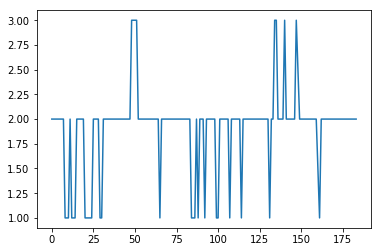

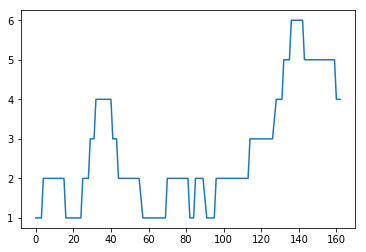

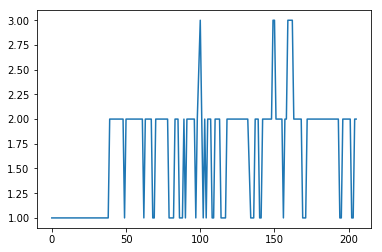

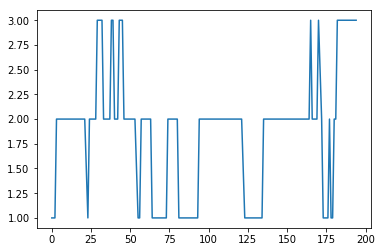

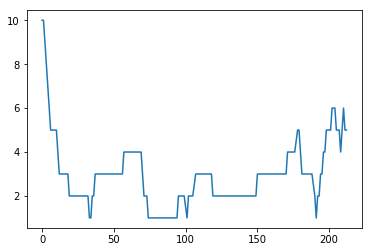

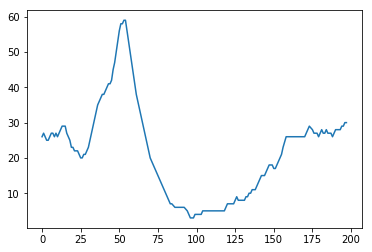

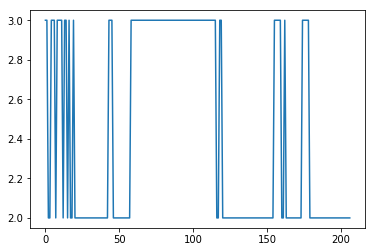

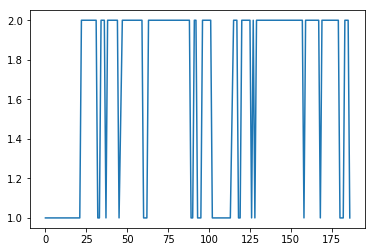

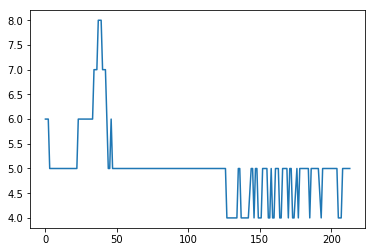

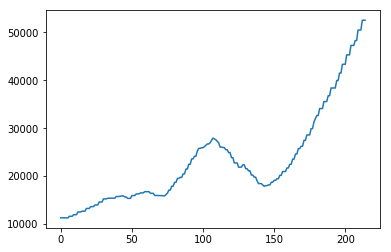

In [11]:
for a in modVSpers[0:10]:
    prices = items.getPrices(a[0])
    prices = prices[int(.85*len(prices)):]
    plt.plot(prices)
    plt.show()

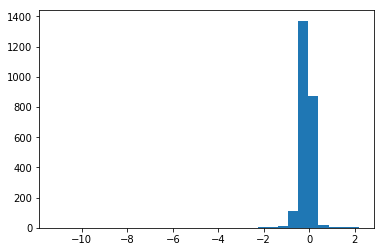

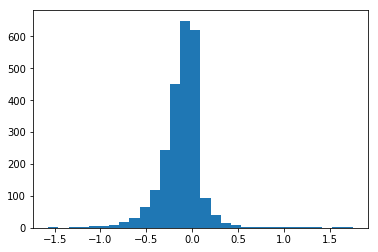

In [12]:
plt.hist([a[1] for a in modVSpers],30)
plt.show()
plt.hist([a[1] for a in modVSpers if a[1]>-2 and a[1]<2],30)
plt.show()

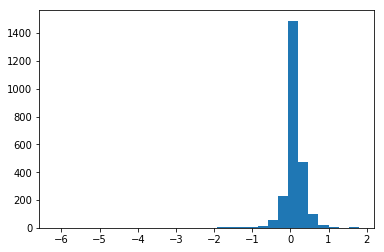

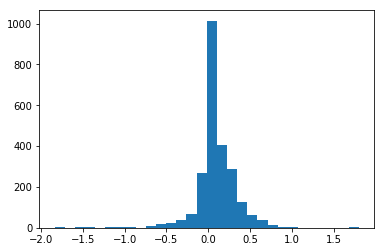

In [13]:
plt.hist([a[1] for a in modVSbah],30)
plt.show()
plt.hist([a[1] for a in modVSbah if a[1]>-2 and a[1]<2],30)
plt.show()

In [14]:
numProfModels = len([a for a in modelProfs if a[1]>0])
numProfmodVSpers = len([a for a in modVSpers if a[1]>0])
numProfmodVSbah = len([a for a in modVSbah if a[1]>0])

In [16]:
print(len(results))
print(numProfModels/len(results))
print(numProfmodVSpers/len(results))
print(numProfmodVSbah/len(results))

2408
0.5083056478405316
0.21220930232558138
0.6407807308970099


In [17]:
actualModProfs = [(item,items.getPrices(item)[-1]*results[item]['model']) for item in results if items.getPrices(item)[-1]<10000000]
actualModProfs = sorted(actualModProfs, key=lambda x: x[1], reverse=True)

In [18]:
actualModProfsPerDay = [(item,(items.getPrices(item)[-1]*results[item]['model'])/(results[item]['numPrices']*.15)) for item in results if items.getPrices(item)[-1]<10000000]
actualModProfsPerDay = sorted(actualModProfsPerDay, key=lambda x: x[1], reverse=True)

In [19]:
actualModProfs[0:10]

[('Staff_of_the_dead', 1965194.309848581),
 ('Serpentine_helm_(uncharged)', 1927839.399861346),
 ("Pharaoh's_sceptre_(3)", 1899512.1482569817),
 ("Rangers'_tunic", 1635614.6261509578),
 ('Old_school_bond', 1621832.7969592186),
 ('Magic_fang', 1601627.6518157746),
 ('Tanzanite_fang', 1209301.143473894),
 ('Toxic_blowpipe_(empty)', 1155358.669904674),
 ("Ahrim's_armour_set", 1073734.8876280128),
 ('Dragon_pickaxe', 928540.1932421485)]

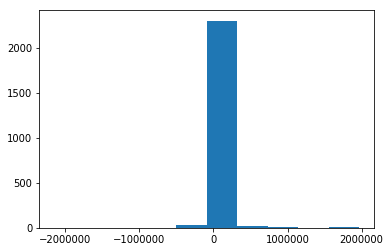

In [22]:
plt.hist([a[1] for a in actualModProfs])
plt.show()

In [28]:
prices = [items.getPrices(item)[-1] for item in results]
buylimits = [int(items.getInfo(item)['buyLimit']) for item in results]
profs = [results[item]['model'] for item in results]
pers = [results[item]['persist'] for item in results]
perf = [results[item]['perfect'] for item in results]
bah = [results[item]['buyAndHold'] for item in results]
mae = [results[item]['endMAE'] for item in results]
prof_perf_diff = [abs(results[item]['perfect'] - results[item]['model']) for item in results]

In [29]:
print(np.corrcoef(prices,profs)[0][1])
print(np.corrcoef(buylimits,profs)[0][1])
print(np.corrcoef(buylimits,prices)[0][1])
print(np.corrcoef(profs,pers)[0][1])
print(np.corrcoef(profs,perf)[0][1])
print(np.corrcoef(profs,bah)[0][1])
print(np.corrcoef(profs,mae)[0][1])
print(np.corrcoef(prof_perf_diff,mae)[0][1])

-0.007090340511386859
0.030385663113876086
-0.049723908194853464
0.6864628776682745
0.6394024769957072
0.7537125630197228
-0.07517993692793266
0.22991568012231106


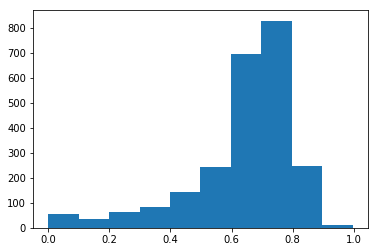

In [26]:
plt.hist(mae)
plt.show()